In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# from carps.analysis.process_data import get_interpolated_performance_df, load_logs, process_logs
from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df, load_logs, process_logs


def print_overview(df_trials: pd.DataFrame) -> None:
    print(df_trials.columns)
    print(df_trials["optimizer_id"].unique())
    print(df_trials["benchmark_id"].unique())
    print(df_trials["problem_id"].unique())
    print(df_trials["scenario"].unique())
    print("Number of seeds", df_trials["seed"].nunique())


# rundir = "../runs"
# df, df_cfg = load_logs(rundir=rundir)
# df = pd.read_csv("../logs_combined.csv")
# df_cfg = pd.read_csv("../logs_combined_cfg.csv")

paths = {
    "BBfull": {
        "full": [
        "../runs/SMAC3-BlackBoxFacade",
        "../runs/RandomSearch",
        "../runs/Nevergrad-CMA-ES",
    ]},
    "MOfull": {
        "full": ["../runs_MO"]
    },
    "BBsubset": {
        "dev": ["../runs_subset_BB/dev"],
        "test": ["../runs_subset_BB/test"],
    }
}
subset = "BBsubset"
problem_prefix = "blackbox/30"

scenarios = ["blackbox", "multi-fidelity"]

def load_set(paths: list[str], set_id: str = "unknown") -> tuple[pd.DataFrame, pd.DataFrame]:
    df = pd.concat([pd.read_parquet(Path(p) / "logs.parquet") for p in paths]).reset_index(drop=True)
    df_cfg = pd.concat([pd.read_parquet(Path(p) / "logs_cfg.parquet") for p in paths]).reset_index(drop=True)
    df["set"] = set_id
    return df, df_cfg

loaded = [load_set(paths=ps, set_id=set_id) for set_id, ps in paths[subset].items()]
df = pd.concat([d for d, _ in loaded]).reset_index(drop=True)
df_cfg = pd.concat([d for _, d in loaded]).reset_index(drop=True)



df = normalize_logs(df)
print_overview(df)
perf = get_interpolated_performance_df(df)
perf_time = get_interpolated_performance_df(df, x_column="time_norm")


[12:40:11] INFO     Start normalization...                                                       ]8;id=962121;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=844921;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#310\310]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=740035;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=686466;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#311\311]8;;\

           INFO     Normalize cost...                                                            ]8;id=476503;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=631295;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#313\313]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=877700;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=541694;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#315\315]8;;\

           INFO     Normalize time...                                                            ]8;id=341832;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=177820;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#317\317]8;;\

[12:40:13] INFO     Done.                                                                        ]8;id=457383;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=765845;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#320\320]8;;\

Index(['n_trials', 'n_function_calls', 'trial_info__config',
       'trial_info__instance', 'trial_info__seed', 'trial_info__budget',
       'trial_info__normalized_budget', 'trial_info__name',
       'trial_info__checkpoint', 'trial_value__cost', 'trial_value__time',
       'trial_value__virtual_time', 'trial_value__status',
       'trial_value__starttime', 'trial_value__endtime', 'seed',
       'benchmark_id', 'problem_id', 'optimizer_id', 'problem.model_id',
       'problem.dataset_id', 'problem.surrogates_dir', 'trial_value__cost_raw',
       'trial_value__cost_inc', 'scenario', 'time', 'problem.dimension',
       'problem.fid', 'problem.instance', 'problem.seed', 'problem.model',
       'problem.task_id', 'problem.budget_type', 'experiment_id', 'set',
       'n_trials_norm', 'trial_value__cost_norm', 'trial_value__cost_inc_norm',
       'time_norm'],
      dtype='object')
['Optuna' 'Nevergrad-CMA-ES' 'SMAC3-BlackBoxFacade' 'RandomSearch'
 'SMAC3-1.4-BlackBoxFacade' 'SyneTune-BO' '

[12:40:14] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=826771;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=246067;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#359\359]8;;\
                    budget.                                                                                        

[12:40:19] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=616299;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=630840;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#359\359]8;;\
                    budget.                                                                                        

In [2]:
# from pymoo.indicators.hv import HV

# def calc_mo_indicators(df: pd.DataFrame) -> pd.DataFrame:
#     new_df = []
#     for gid, gdf in df.groupby(by=["scenario", "problem_id"]):
#         scenario, problem_id = gid
#         if scenario == "multi-objective":
#             gdf["trial_value__cost_raw"] = gdf["trial_value__cost_raw"].apply(eval)
#             cost = gdf["trial_value__cost_raw"].to_numpy()
#             cost = np.concatenate(cost).reshape(-1, len(cost[0]))
#             reference_point = np.max(cost, axis=0)
#             hv_history = []
#             for i in range(len(cost)):
#                 ind = HV(ref_point=reference_point, pf=cost)
#                 hv_history.append(ind(cost[:i]))
#             gdf["trial_value__cost_hv"] = hv_history
#         new_df.append(gdf)
#     return pd.concat(new_df).reset_index(drop=True)

# df_mo = calc_mo_indicators(df)


----------------------------------------------------------------------------------------------------
('blackbox', 'dev')


[15:41:31] INFO     Lost following experiments: optimizer_id                                    ]8;id=156356;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=400846;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#108\108]8;;\
                    HEBO  Nevergrad-CMA-ES  Optuna  \                                                              
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120   NaN          0.477053                          
                    NaN                                                                                            
                                                                                                                   
                    optimizer_id                                   RandomSearch  \                                 
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120      0.453472                                    
                                                                                                                   
                    optimizer_id                                   SMAC3-1.4-BlackBoxFacade  \                     
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120                  0.466012                        
                                                                                                                   
                    optimizer_id                                   SMAC3-BlackBoxFacade  \                         
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120               0.45513                            
                                                                                                                   
                    optimizer_id                                   SMAC3-HPOFacade  \                              
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120         0.460723                                 
                                                                                                                   
                    optimizer_id                                   Scikit_Optimize  SyneTune-BO                    
                    problem_id                                                                                     
                    blackbox/30/dev/hpobench/bb/tab/ml/svm/167120              NaN     0.481661                    

Rejecting null hypothesis that data is normal for column HEBO (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Optuna (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-1.4-BlackBoxFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Scikit_Optimize (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SyneTune-BO (p=0.000000<0.005556)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test.

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:224: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_line([(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)], linewidth=0.7)
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:229: FutureWarning: Serie

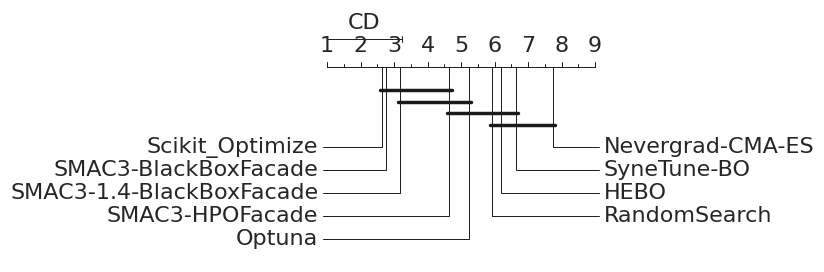

The statistical analysis was conducted for 9 populations with 29 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations Scikit_Optimize (p=0.000), SMAC3-BlackBoxFacade (p=0.000), SMAC3-1.4-BlackBoxFacade (p=0.000), SMAC3-HPOFacade (p=0.000), Optuna (p=0.000), RandomSearch (p=0.000), HEBO (p=0.000), SyneTune-BO (p=0.000), and Nevergrad-CMA-ES (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between popula

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


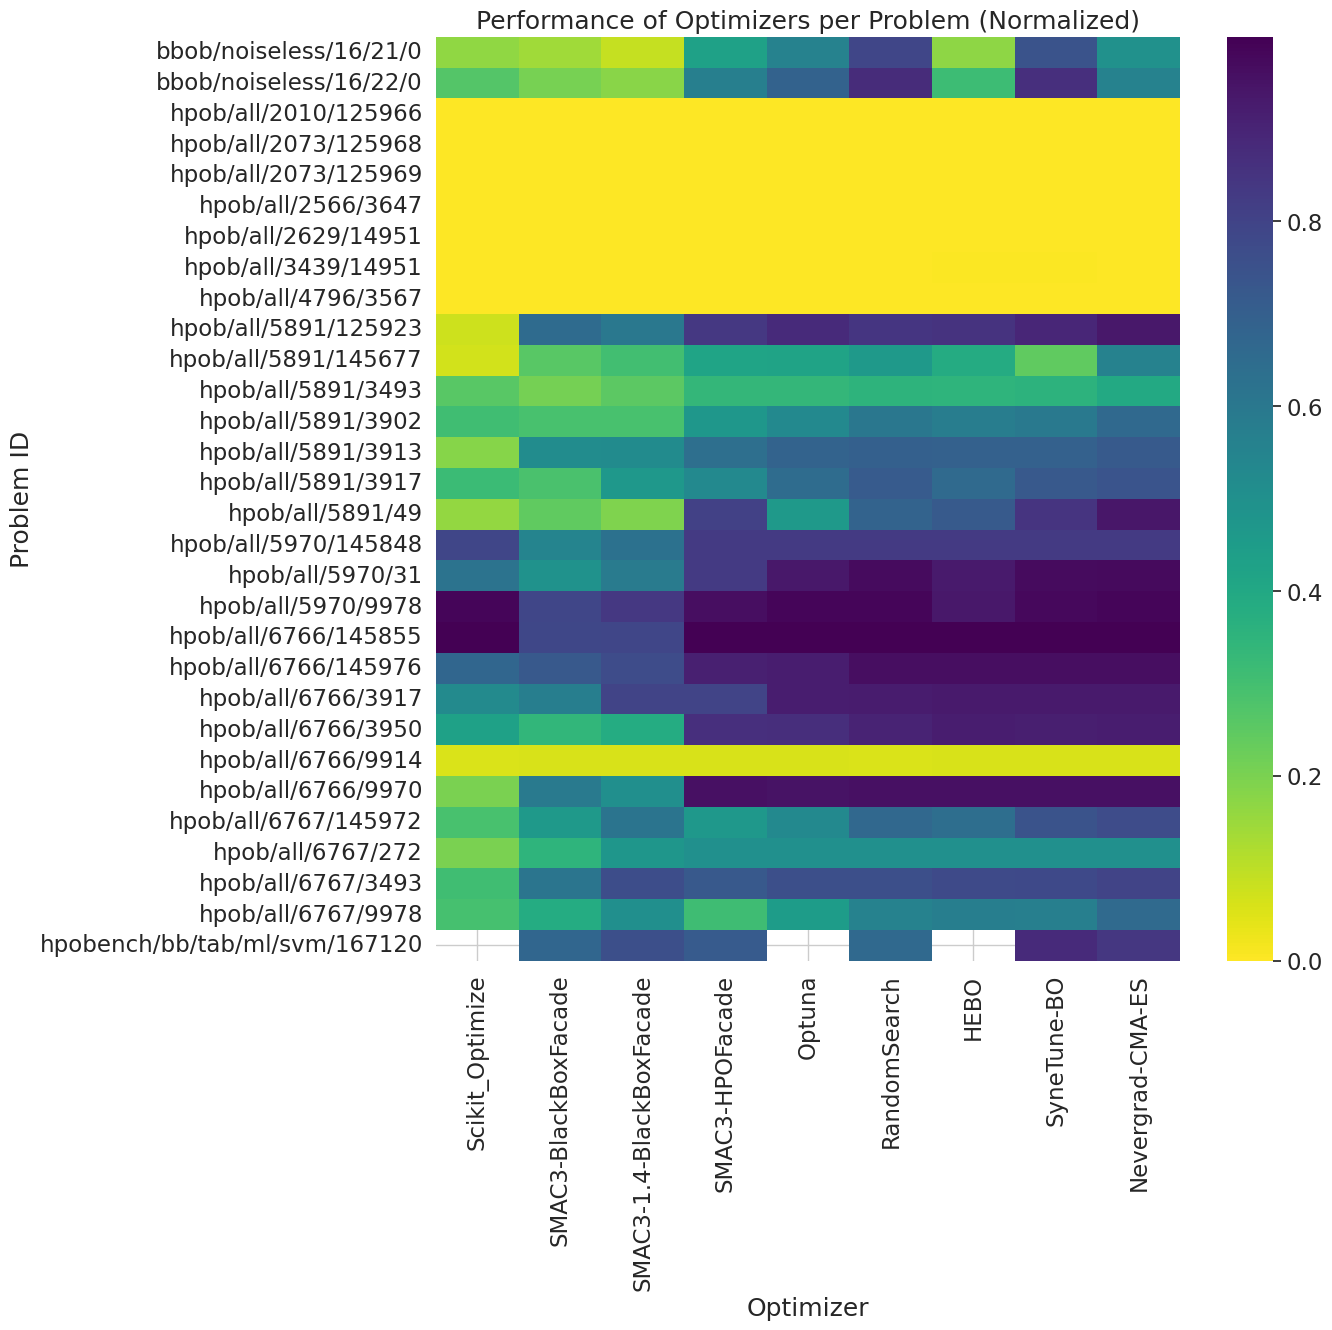

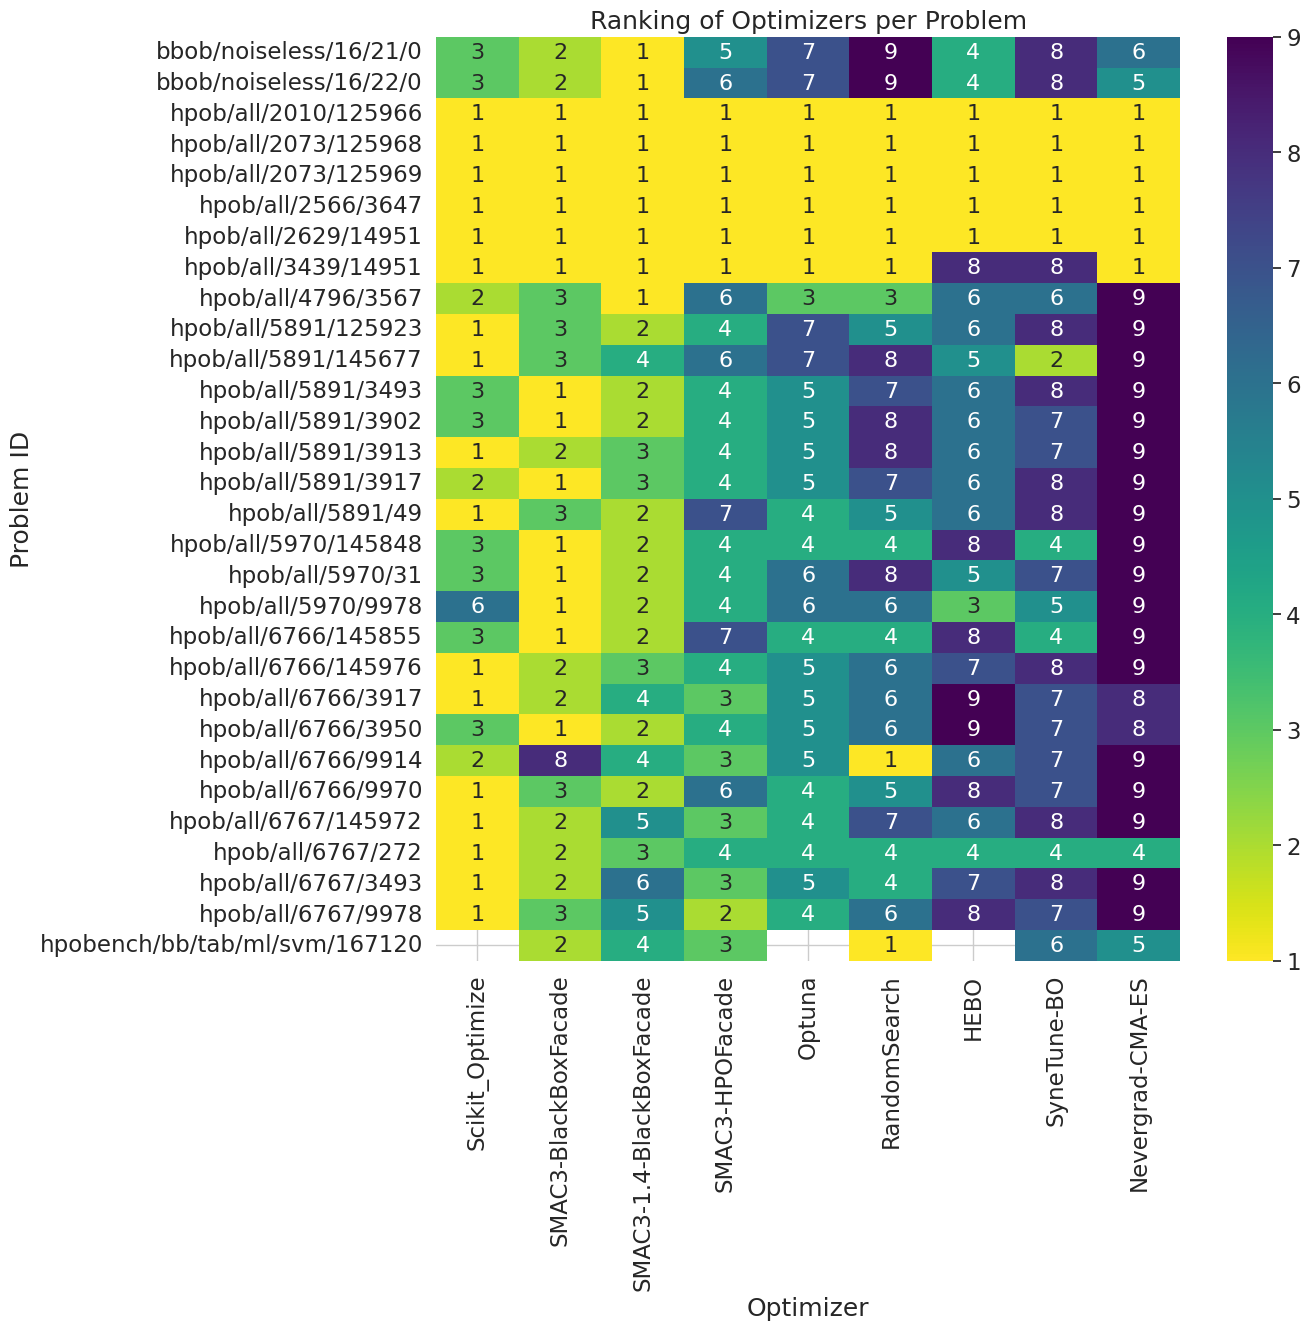

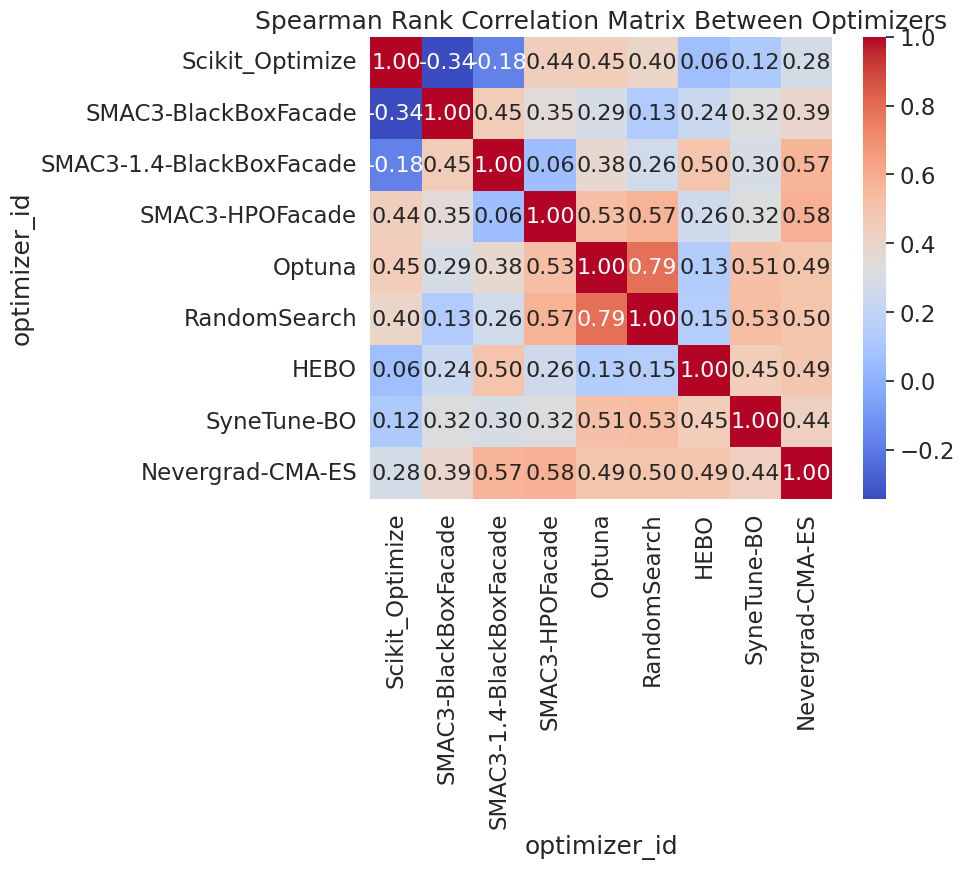

----------------------------------------------------------------------------------------------------
('blackbox', 'test')


[15:41:39] INFO     Lost following experiments: optimizer_id                                    ]8;id=808228;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=267595;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#108\108]8;;\
                    HEBO  Nevergrad-CMA-ES  Optuna  \                                                              
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965   NaN          0.097855                          
                    NaN                                                                                            
                                                                                                                   
                    optimizer_id                                   RandomSearch  \                                 
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965      0.098143                                    
                                                                                                                   
                    optimizer_id                                   SMAC3-1.4-BlackBoxFacade  \                     
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965                  0.097766                        
                                                                                                                   
                    optimizer_id                                   SMAC3-BlackBoxFacade  \                         
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965              0.097766                            
                                                                                                                   
                    optimizer_id                                   SMAC3-HPOFacade  \                              
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965          0.09792                                 
                                                                                                                   
                    optimizer_id                                   Scikit_Optimize  SyneTune-BO                    
                    problem_id                                                                                     
                    blackbox/30/test/hpobench/bb/tab/ml/svm/14965              NaN     0.104243                    

Rejecting null hypothesis that data is normal for column HEBO (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Optuna (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-1.4-BlackBoxFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column Scikit_Optimize (p=0.000000<0.005556)
Rejecting null hypothesis that data is normal for column SyneTune-BO (p=0.000000<0.005556)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test.

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:224: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_line([(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)], linewidth=0.7)
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:229: FutureWarning: Serie

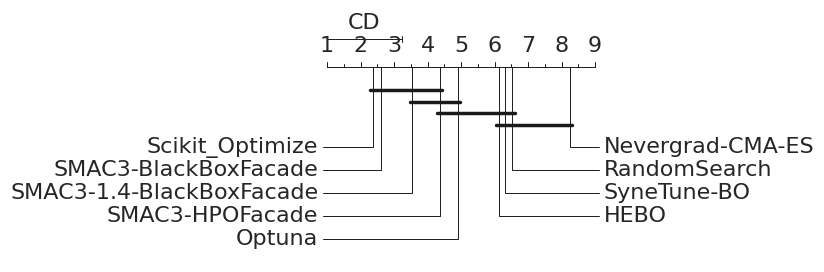

The statistical analysis was conducted for 9 populations with 29 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations Scikit_Optimize (p=0.000), SMAC3-BlackBoxFacade (p=0.000), SMAC3-1.4-BlackBoxFacade (p=0.000), SMAC3-HPOFacade (p=0.000), Optuna (p=0.000), HEBO (p=0.000), SyneTune-BO (p=0.000), RandomSearch (p=0.000), and Nevergrad-CMA-ES (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between popula

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


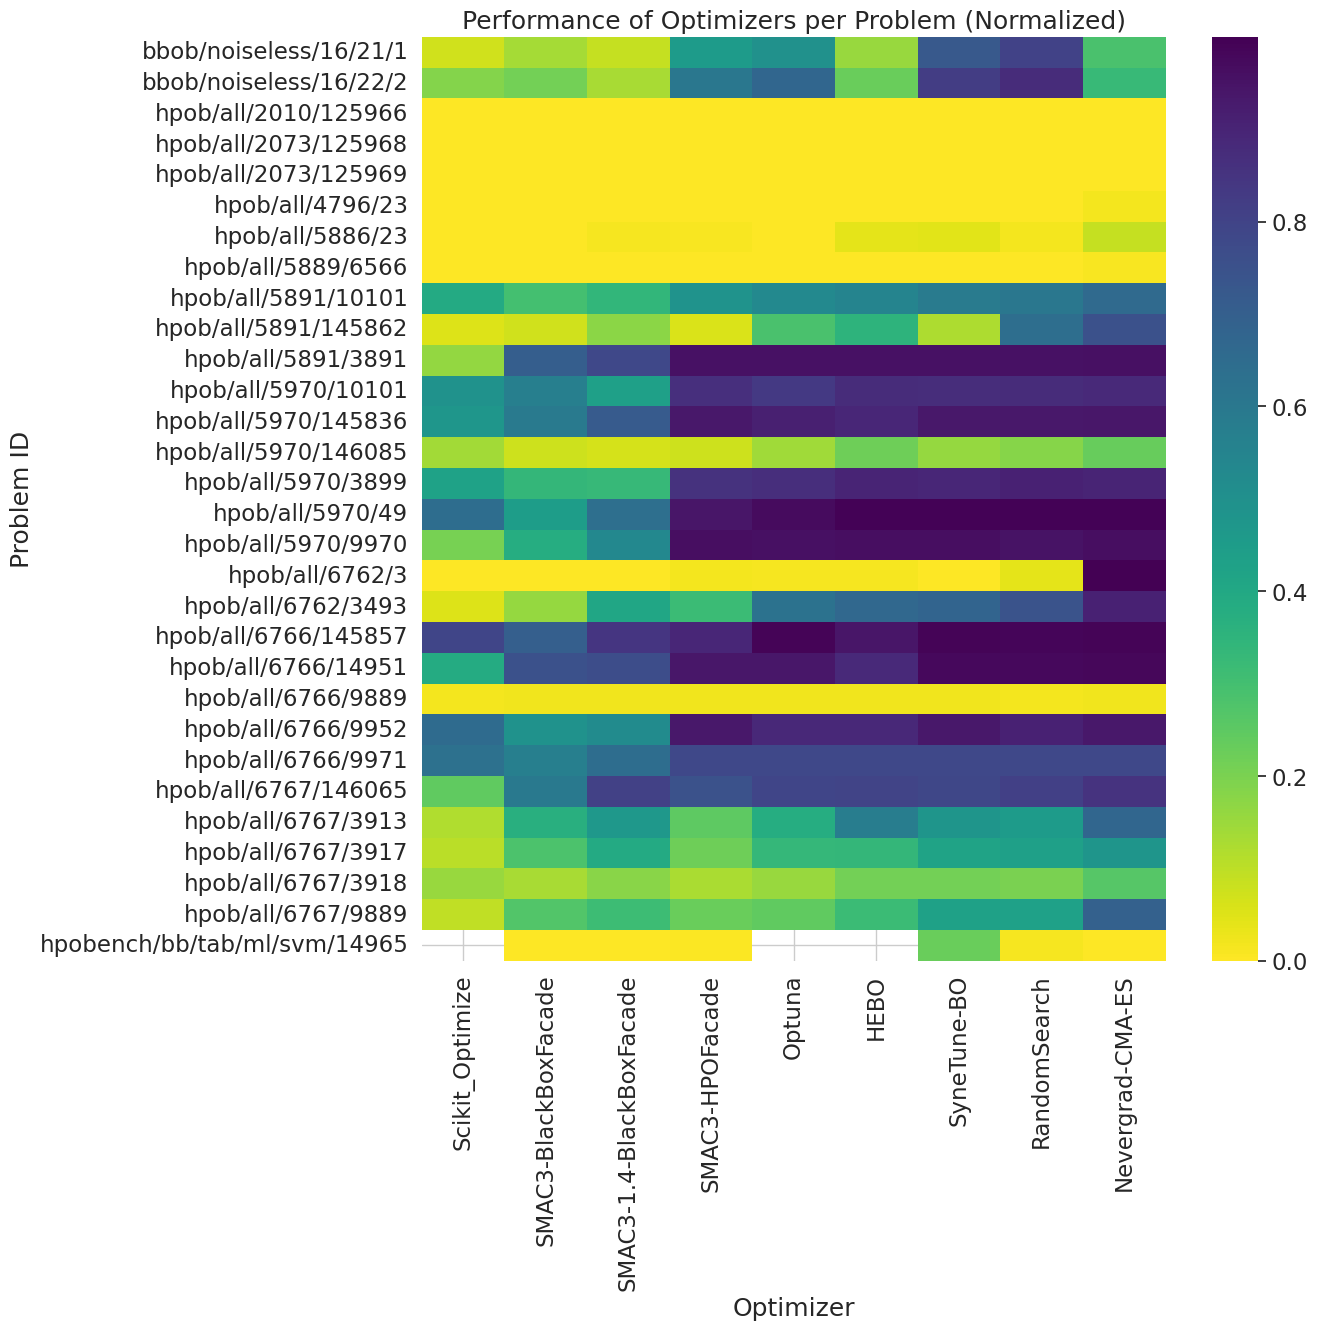

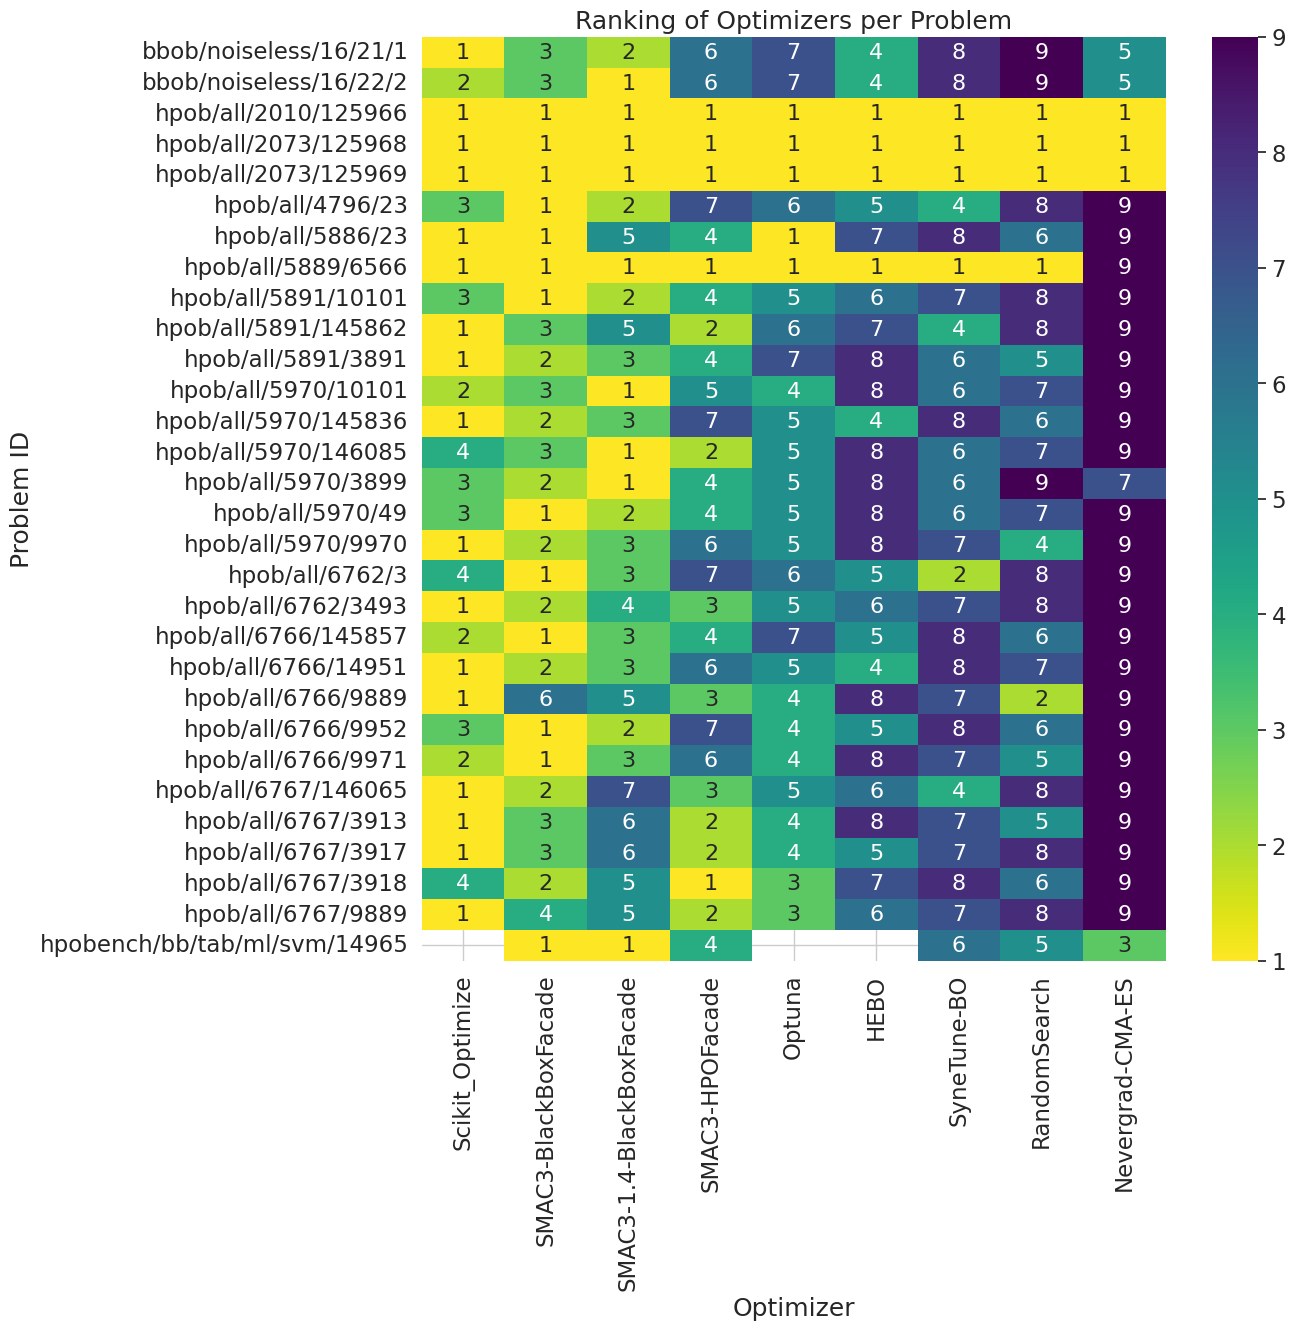

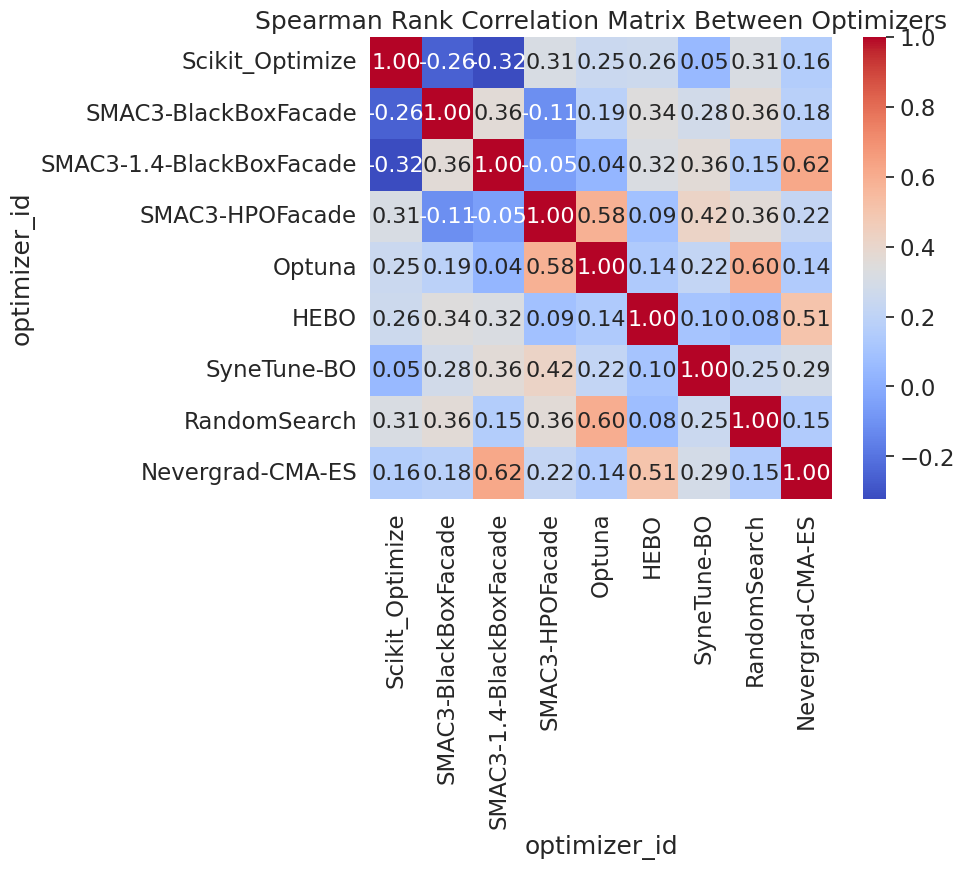

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table
from autorank._util import get_sorted_rank_groups
from carps.analysis.run_autorank import calc_critical_difference, custom_latex_table, get_df_crit
from carps.analysis.utils import savefig
import seaborn as sns

for gid, gdf in df.groupby(by=["scenario", "set"]):    
    print("-"*100)
    print(gid)
    scenario, set_id = gid
    if len(gdf) > 0:
        fpath = Path("figures/ranking")
        fpath.mkdir(exist_ok=True, parents=True)
        identifier = f"{scenario}_{set_id}"
        label = f"tab:stat_results_{identifier}"
        result = calc_critical_difference(gdf, identifier=identifier, figsize=(8,3))
        create_report(result)
        table_str = custom_latex_table(result, label=label)
        fn = Path("figures/critd/" + label[len("tab:"):] + ".tex")
        fn.write_text(table_str)
        print(table_str)
        plt.show()

        sorted_ranks, names, groups = get_sorted_rank_groups(result, reverse=False)
        print(sorted_ranks, names, groups)

        # DF on normalized perf values
        df_crit = get_df_crit(gdf, remove_nan=False, perf_col="trial_value__cost_inc_norm")
        df_crit = df_crit.reindex(columns=names)
        df_crit.index = [i.replace(problem_prefix + "/dev/", "") for i in df_crit.index]
        df_crit.index = [i.replace(problem_prefix + "/test/", "") for i in df_crit.index]
        plt.figure(figsize=(12, 12))
        sns.heatmap(df_crit, annot=False, fmt="g", cmap='viridis_r')
        plt.title('Performance of Optimizers per Problem (Normalized)')
        plt.ylabel('Problem ID')
        plt.xlabel('Optimizer')
        savefig(plt.gcf(), fpath / f"perf_opt_per_problem_{identifier}")
        plt.show()

        # Df on raw values
        # Optionally, plot the ranked data as a heatmap
        df_crit = get_df_crit(gdf, remove_nan=False)
        df_crit = df_crit.reindex(columns=names)
        df_crit.index = [i.replace(problem_prefix + "/dev/", "") for i in df_crit.index]
        df_crit.index = [i.replace(problem_prefix + "/test/", "") for i in df_crit.index]
        ranked_df = df_crit.rank(axis=1, method='min', ascending=True)

        plt.figure(figsize=(12, 12))
        sns.heatmap(ranked_df, annot=True, fmt="g", cmap='viridis_r')
        plt.title('Ranking of Optimizers per Problem')
        plt.ylabel('Problem ID')
        plt.xlabel('Optimizer')
        savefig(plt.gcf(), fpath / f"rank_opt_per_problem_{identifier}")
        plt.show()

        # Plotting the heatmap of the rank correlation matrix
        correlation_matrix = ranked_df.corr(method='spearman')
        plt.figure(figsize=(8,6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt=".2f")
        plt.title('Spearman Rank Correlation Matrix Between Optimizers')
        savefig(plt.gcf(), fpath / f"spearman_rank_corr_matrix_opt_{identifier}")
        plt.show()

In [4]:

# fig, axes = plot_interval_estimates(performance_data=perf, load_from_pickle=False, figure_filename="figures/plot_interval_estimates.pdf")

('blackbox', 'dev')


('blackbox', 'test')
('blackbox', 'dev')
('blackbox', 'test')


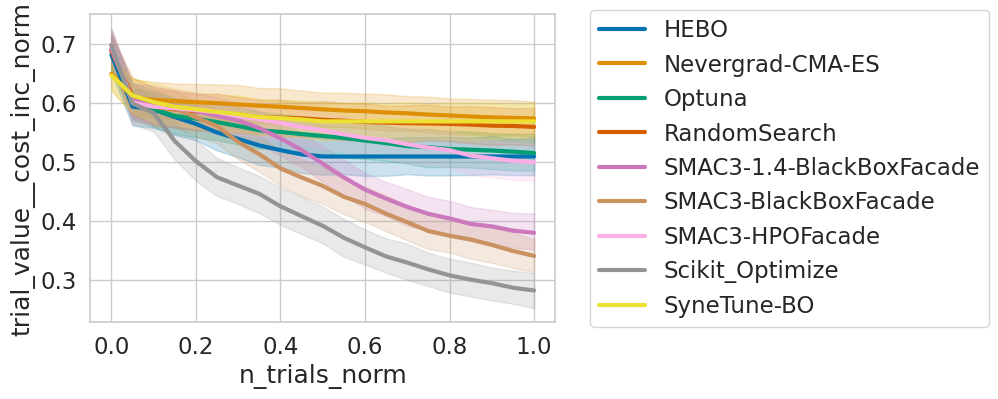

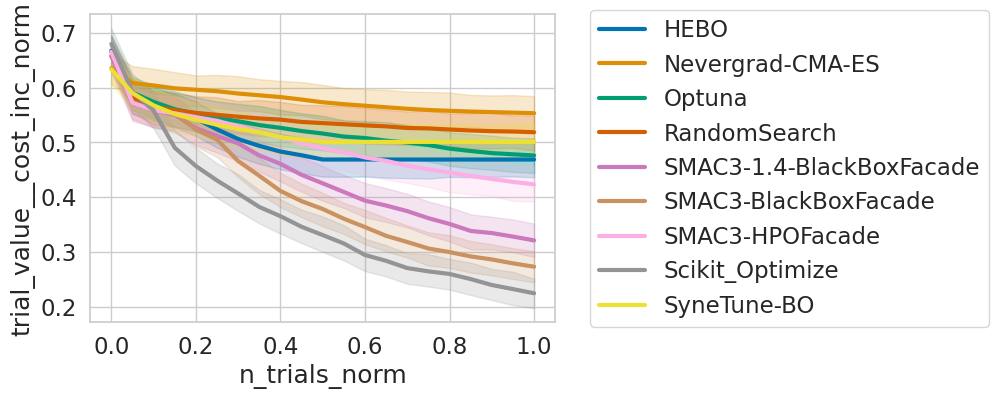

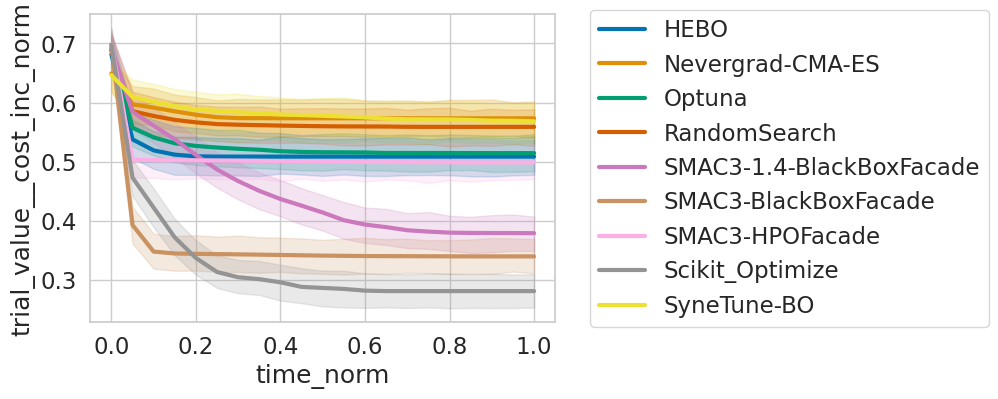

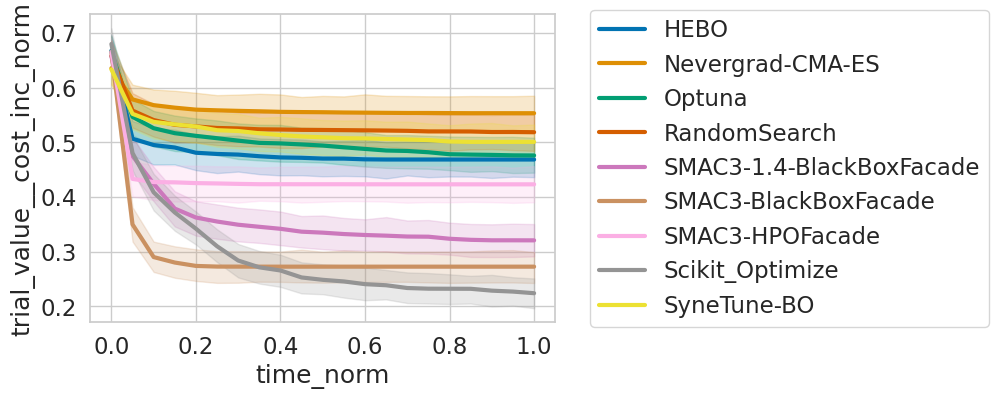

In [5]:
from carps.analysis.performance_over_time import plot_performance_over_time, setup_seaborn, savefig, get_color_palette
import seaborn as sns
import matplotlib
lineplot_kwargs = dict(linewidth=3)
for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="n_trials_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_trials.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )
for gid, gdf in perf_time.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="time_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_elapsed.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )

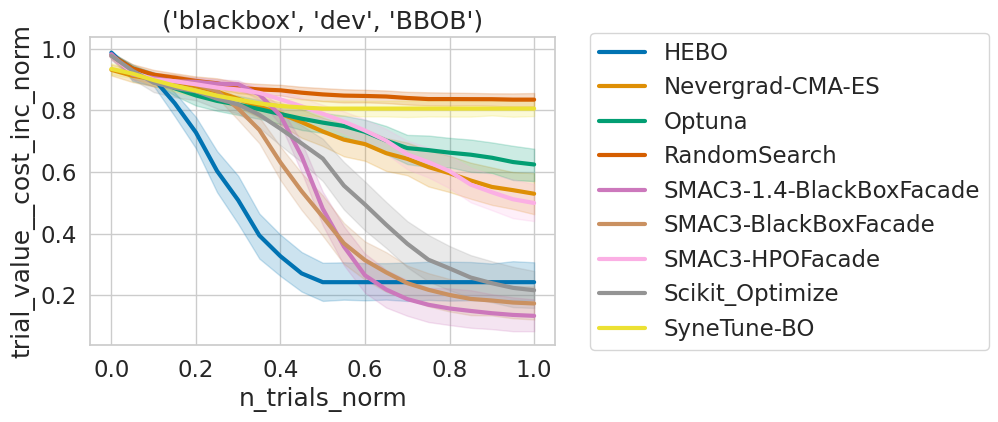

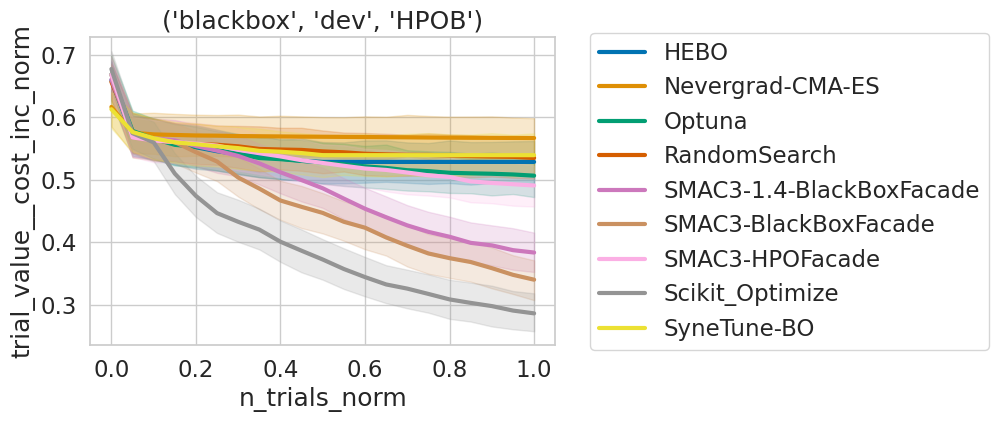

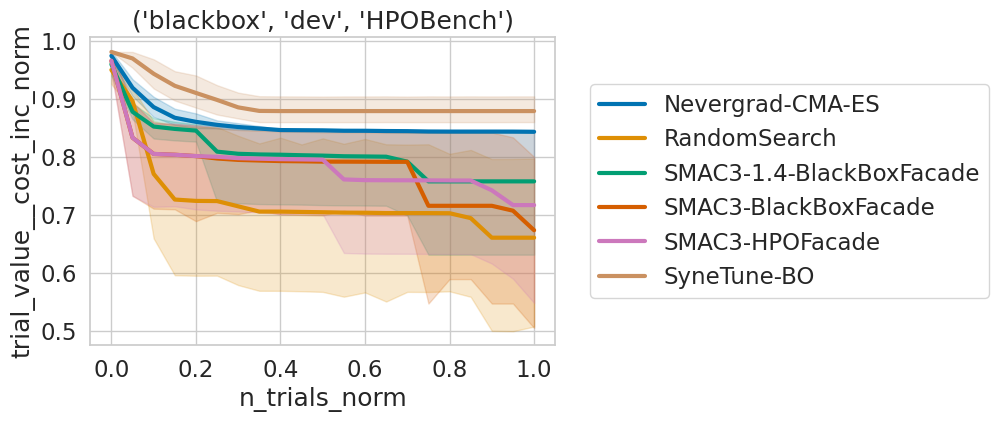

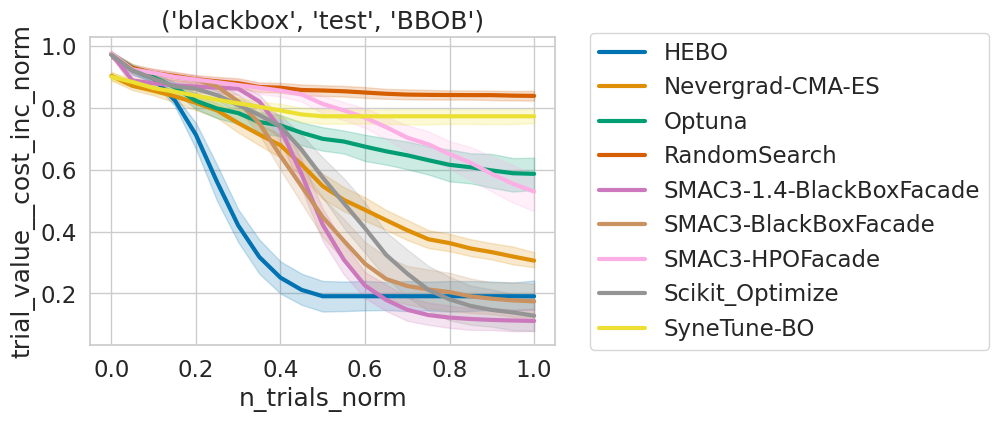

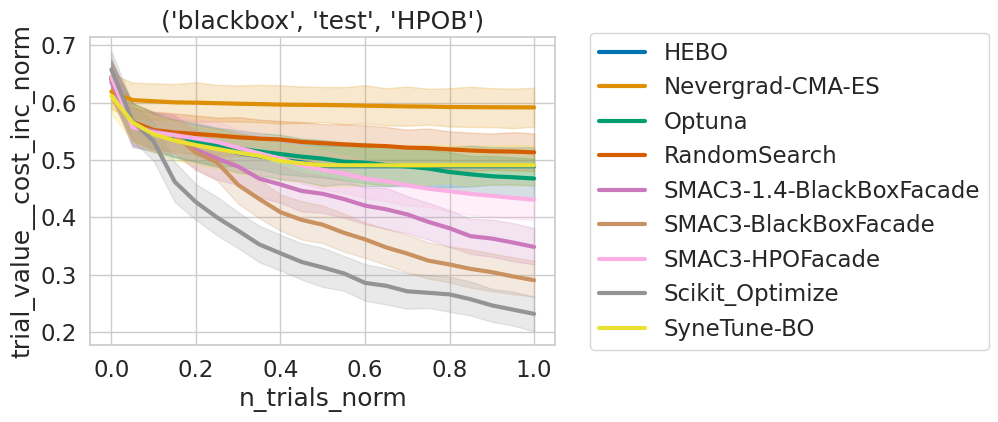

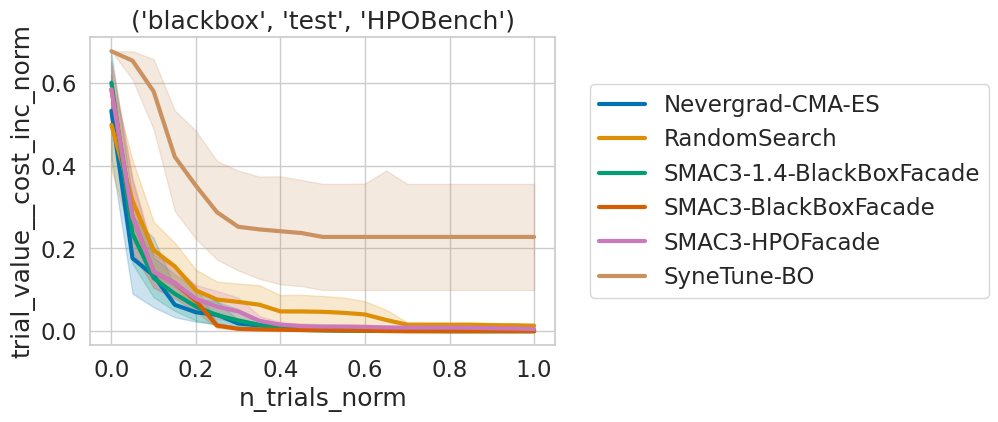

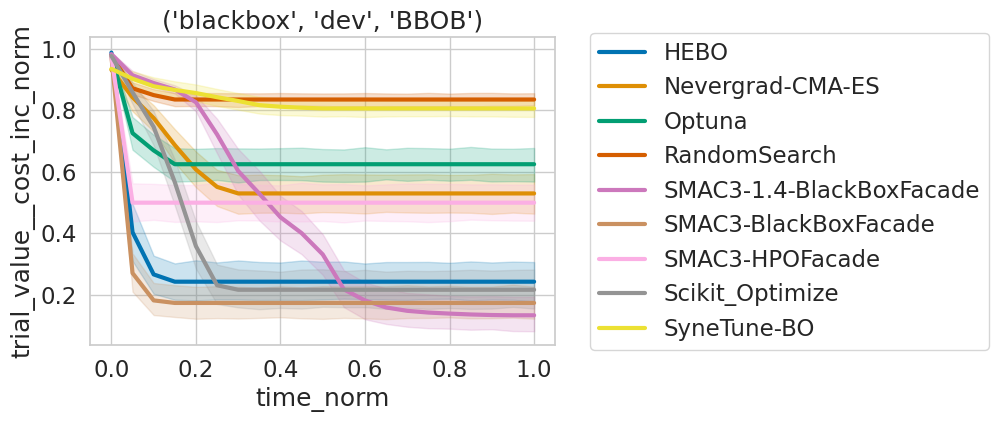

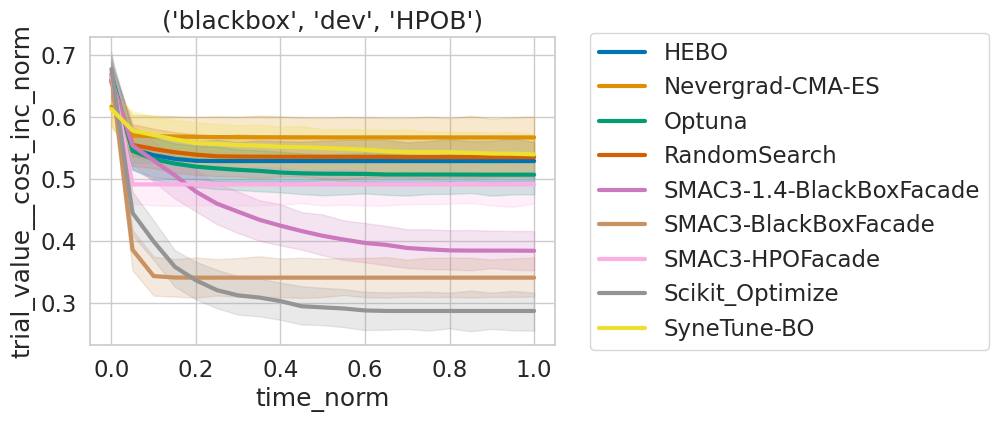

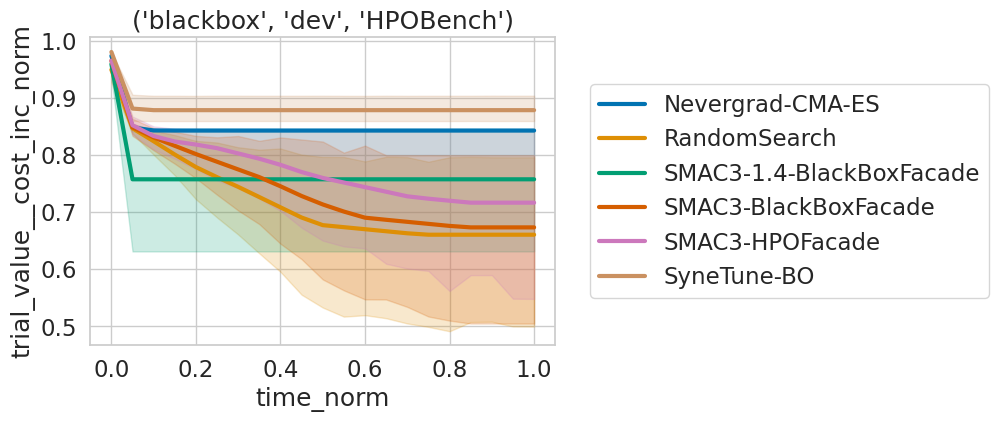

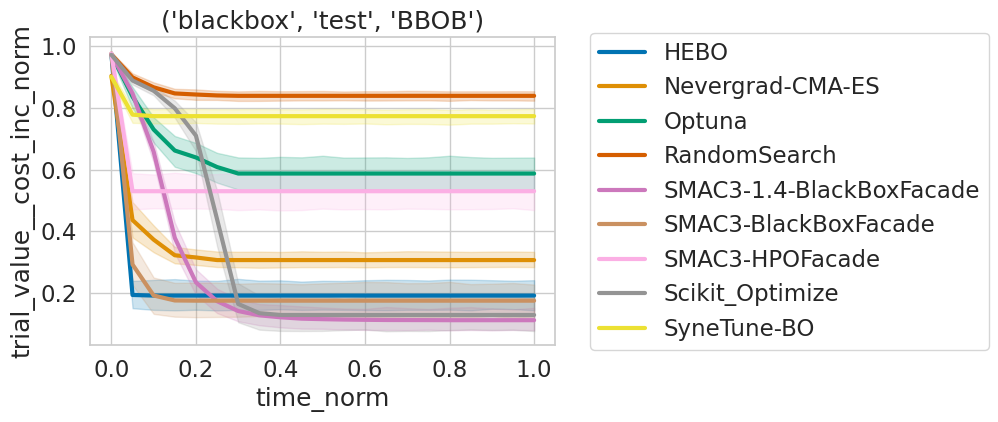

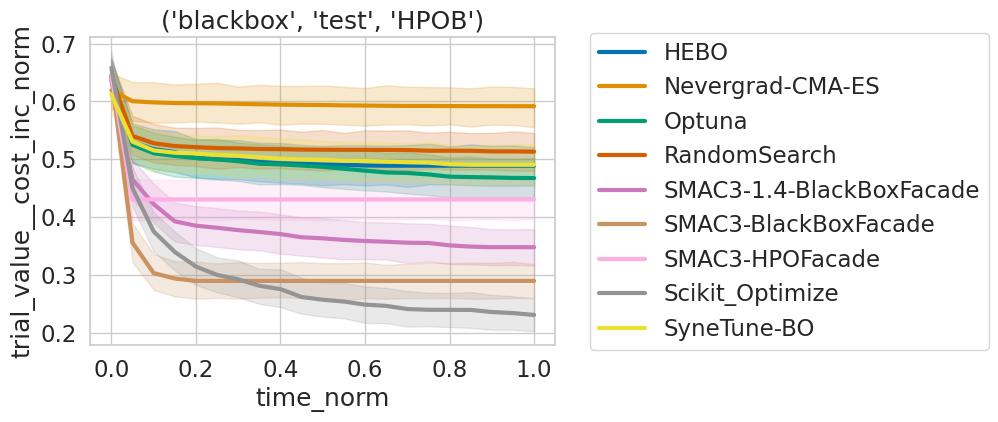

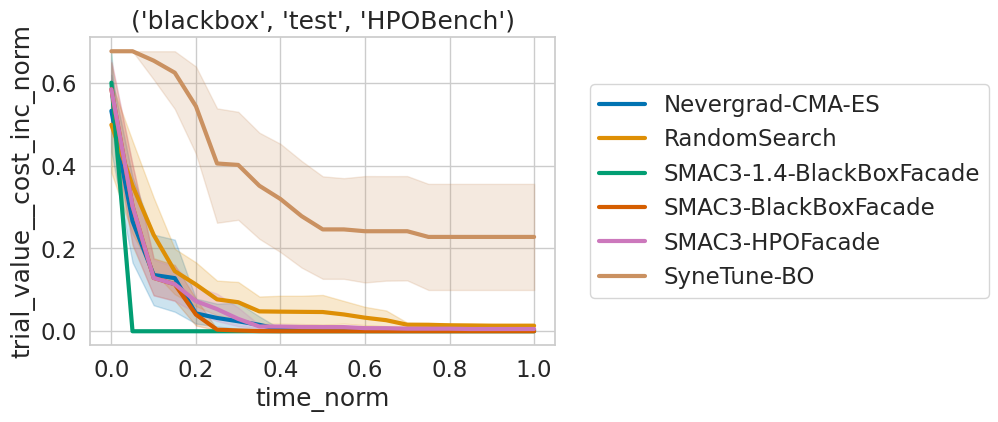

In [6]:
# Plot per benchmark
from carps.analysis.utils import get_color_palette, savefig
from carps.analysis.performance_over_time import plot_performance_over_time

palette = get_color_palette(perf)
lineplot_kwargs = dict(linewidth=3)

for gid, gdf in perf.groupby(by=["scenario", "set", "benchmark_id"]):
    # Iterations
    figure_filename = f"figures/perf_over_time/performance_over_time_trials_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

# Elapsed time
for gid, gdf in perf_time.groupby(by=["scenario", "set", "benchmark_id"]):    
    figure_filename = f"figures/perf_over_time/performance_over_time_elapsed_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="time_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

In [12]:
from carps.analysis.final_performance import plot_final_performance_boxplot, plot_final_performance_violinplot
from carps.analysis.utils import filter_only_final_performance

boxplot_kwargs = dict()

for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_final_performance_boxplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_boxplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)
    fig, ax = plot_final_performance_violinplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_violinplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)

('blackbox', 'dev')


        n_trials_norm  trial_value__cost  trial_value__cost_norm  \
20                1.0         330.937943                0.233321   
41                1.0         324.086675                0.154031   
62                1.0         326.520325                0.182196   
83                1.0         317.826963                0.081587   
104               1.0         324.405506                0.157721   
...               ...                ...                     ...   
112055            1.0           0.494827                0.980478   
112076            1.0           0.494820                0.980424   
112097            1.0           0.495721                0.987400   
112118            1.0           0.494806                0.980316   
112139            1.0           0.494820                0.980424   

        trial_value__cost_inc  trial_value__cost_inc_norm  scenario  set  \
20                 329.951551                    0.221905  blackbox  dev   
41                 320.229753  

ValueError: could not convert string to float: 'blackbox'

<Figure size 1200x1200 with 0 Axes>

In [8]:
max_val = df["n_trials_norm"].max()
error = df.groupby(by=["benchmark_id", "problem_id", "optimizer_id", "seed"])["n_trials_norm"].apply(lambda x: not np.isclose(x.max(), max_val))
error = error[error]
for i in error.index:
    print(i)

('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 1)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 2)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 3)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 4)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 5)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 6)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 7)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 8)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 9)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 10)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 11)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 12)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 13)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 14)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 15)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'HEBO', 16)
(